In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'C:\Users\Nbdav\World Happiness analysis'

In [3]:
#importing data sets
df_world = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'world_hap.csv'), index_col = False)

In [4]:
df_world.dtypes

Unnamed: 0                        int64
Country name                     object
year                              int64
Ladder score                    float64
Loggged GDP per capita          float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Positive affect                 float64
Negative affect                 float64
Happiness                        object
dtype: object

In [5]:
df_world = df_world.astype({"Country name": str}, errors='raise') 

In [27]:
df_world = df_world.drop(columns=[ 'Happiness'])

In [16]:
df_world.drop(columns=[unnamed:0])

SyntaxError: invalid syntax (Temp/ipykernel_18676/321932910.py, line 1)

In [22]:
df_world.isnull().sum()

Unnamed: 0                        0
year                              0
Ladder score                      0
Loggged GDP per capita           36
Social support                   13
Healthy life expectancy          55
Freedom to make life choices     32
Generosity                       89
Perceptions of corruption       110
Positive affect                  22
Negative affect                  16
Happiness                         0
dtype: int64

In [29]:
df_world.dropna(inplace = True)

In [19]:
df_world.isnull().sum()

Unnamed: 0                        0
Country name                      0
year                              0
Ladder score                      0
Loggged GDP per capita           36
Social support                   13
Healthy life expectancy          55
Freedom to make life choices     32
Generosity                       89
Perceptions of corruption       110
Positive affect                  22
Negative affect                  16
Happiness                         0
dtype: int64

In [6]:
df_world.shape

(1949, 13)

In [23]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [24]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [30]:
score = [kmeans[i].fit(df_world).score(df_world) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Nbdav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[-539548849.3436502,
 -133210540.6407681,
 -60815216.58647678,
 -33264842.707256798,
 -21875438.43649713,
 -15107642.598647287,
 -11230955.080248812,
 -8591749.807603372,
 -6785321.072659954]

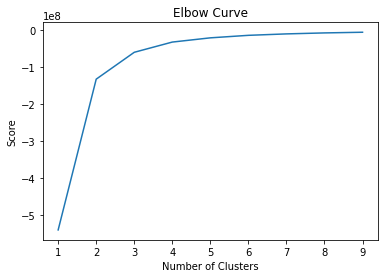

In [31]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [59]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [60]:
# Fit the k-means object to the data.

kmeans.fit(df_world)

C:\Users\Nbdav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [61]:
df_world['clusters'] = kmeans.fit_predict(df_world)

C:\Users\Nbdav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [62]:
df_world.head(20)

,Unnamed: 0,year,Ladder score,Loggged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,clusters
0,0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,2
1,1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,2
2,2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,2
3,3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,2
4,4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,2
5,5,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,2
6,6,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,2
7,7,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339,2
8,8,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348,2
9,9,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371,2


In [63]:
df_world['clusters'].value_counts()

3    459
1    432
0    410
2    407
Name: clusters, dtype: int64

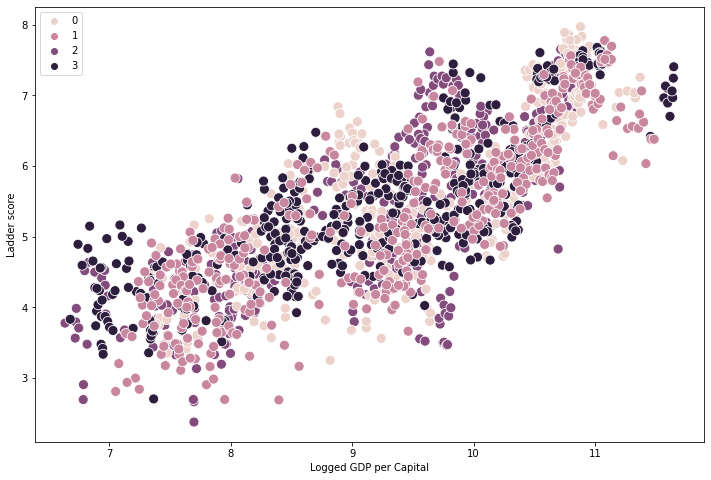

In [64]:
# Plot the clusters.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_world['Loggged GDP per capita'], y=df_world['Ladder score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Logged GDP per Capital') # Label x-axis.
plt.ylabel('Ladder score') # Label y-axis.
plt.show()

In [66]:
df_world.loc[df_world['clusters'] == 4, 'cluster'] = 'black'
df_world.loc[df_world['clusters'] == 2, 'cluster'] = 'dark purple'
df_world.loc[df_world['clusters'] == 1, 'cluster'] = 'purple'
df_world.loc[df_world['clusters'] == 0, 'cluster'] = 'pink'

In [69]:
df_world.groupby('cluster').agg({'Ladder score':['mean', 'median'], 
                         'Loggged GDP per capita':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                          'Freedom to make life choices':['mean', 'median'],
                                'Healthy life expectancy':['mean', 'median']})

Ladder score        Loggged GDP per capita         Social support  \
                    mean median                   mean  median           mean   
cluster                                                                         
dark purple     5.396297  5.304               9.232899  9.5220       0.784074   
pink            5.620059  5.484               9.551437  9.4725       0.813178   
purple          5.353454  5.300               9.337863  9.4980       0.827049   

                   Freedom to make life choices          \
            median                         mean  median   
cluster                                                   
dark purple  0.810                     0.726329  0.7470   
pink         0.840                     0.748859  0.7715   
purple       0.857                     0.741525  0.7545   

            Healthy life expectancy         
                               mean median  
cluster                                     
dark purple               62.789582  65.54  
pink                      64.503366  65.10  
purple                    63.072711  65.48

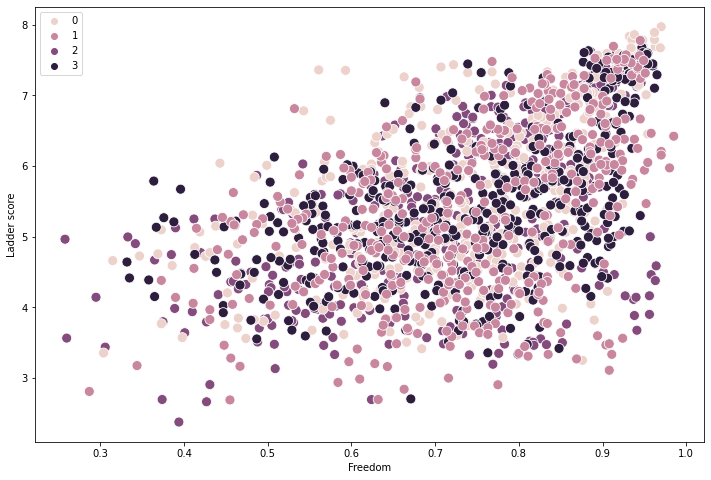

In [65]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_world['Freedom to make life choices'], y=df_world['Ladder score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Ladder score') # Label y-axis.
plt.show()

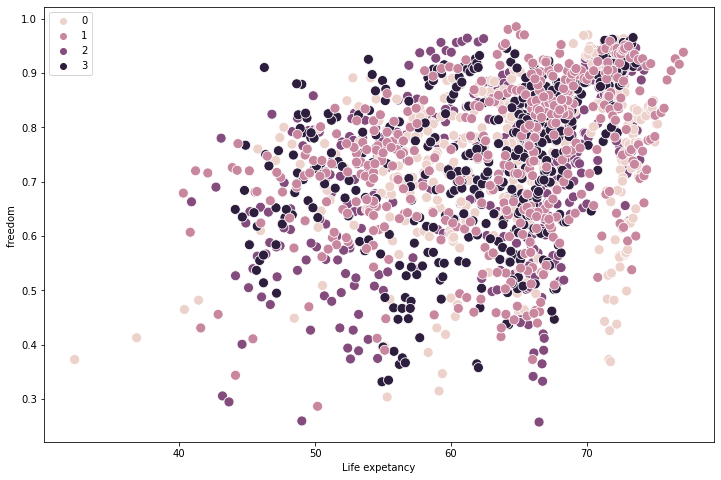

In [70]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_world['Healthy life expectancy'], y=df_world['Freedom to make life choices'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life expetancy') # Label x-axis.
plt.ylabel('freedom ') # Label y-axis.
plt.show()

**Can use this to find new relationships to explore, freedom and life expectancy. Pink clusters seem to have the highest means. 